In [ ]:
!pip install cdlib
!pip install python-igraph
!pip install leidenalg



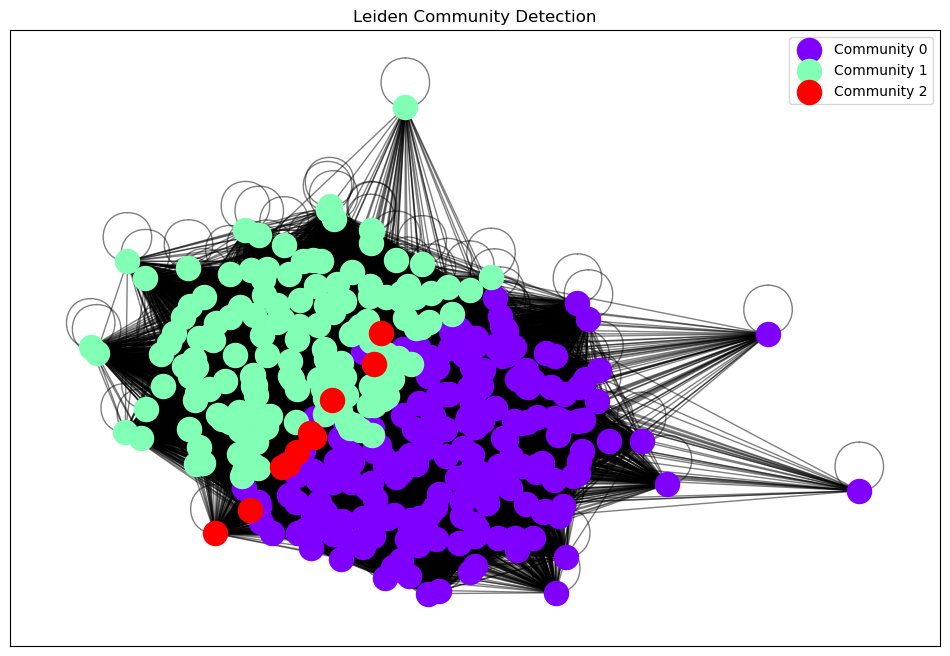

In [7]:
import networkx as nx
from cdlib import algorithms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

# Load the CSV file
file_path = 'Cleaned_data_final.csv'
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges from the data
for _, row in data.iterrows():
    G.add_edge(row['Start station number'], row['End station number'])

# Apply the Leiden community detection algorithm
coms = algorithms.leiden(G)

# Extract communities
communities = coms.communities

# Visualize the communities
pos = nx.spring_layout(G)
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

plt.figure(figsize=(12, 8))
for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color], label=f"Community {communities.index(community)}")

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.legend()
plt.title('Leiden Community Detection')
plt.show()


In [14]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/d4/55/90db48d85f7689ec6f81c0db0622d704306c5284850383c090e6c7195a5c/pip-24.2-py3-none-any.whl.metadata
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pandas networkx cdlib folium


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import networkx as nx
from cdlib import algorithms
import folium
from folium.plugins import MarkerCluster

# Load the dataset
file_path = 'Cleaned_data_final.csv'
data = pd.read_csv(file_path)

# Function to parse coordinates safely
def parse_coordinates(lat, lon):
    try:
        return float(lat), float(lon)
    except ValueError:
        return None

# Create a graph from the dataset
G = nx.Graph()

# Add edges to the graph
for index, row in data.iterrows():
    start = parse_coordinates(row['lat_start'], row['lon_start'])
    end = parse_coordinates(row['lat_end'], row['lon_end'])
    if start and end and start != end:
        G.add_edge(start, end)

# Apply the Leiden algorithm for community detection
communities = algorithms.leiden(G)

# Create a map centered around Central London
central_london_coords = [51.5074, -0.1278]
map_london = folium.Map(location=central_london_coords, zoom_start=12)

# Add markers for each community
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
          'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 
          'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# MarkerCluster to manage the markers better
marker_cluster = MarkerCluster().add_to(map_london)

# Iterate through communities and add markers to the map
for community_index, community in enumerate(communities.communities):
    color = colors[community_index % len(colors)]
    for node in community:
        folium.Marker(location=node, icon=folium.Icon(color=color)).add_to(marker_cluster)

# Save the map to an HTML file
map_london_path = 'london_communities_map.html'
map_london.save(map_london_path)
